In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [40]:
# Load CSV
df = pd.read_csv('/Users/adarshnagia/Downloads/heart_disease.csv')
df.head()


,Age,Gender,Cholesterol,Blood Pressure,Heart Disease
0,70,Female,168,143/83,No
1,37,Female,281,150/85,Yes
2,31,Female,210,143/95,No
3,77,Male,221,126/89,No
4,47,Female,274,168/90,Yes


In [41]:
# Shape
print("Shape:", df.shape)

# Info
print(df.info())

# Missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())


Shape: (100, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             100 non-null    int64 
 1   Gender          100 non-null    object
 2   Cholesterol     100 non-null    int64 
 3   Blood Pressure  100 non-null    object
 4   Heart Disease   100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB
None
Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
Duplicates: 0


In [42]:
df = df.drop_duplicates()


In [43]:
df = df.drop_duplicates()


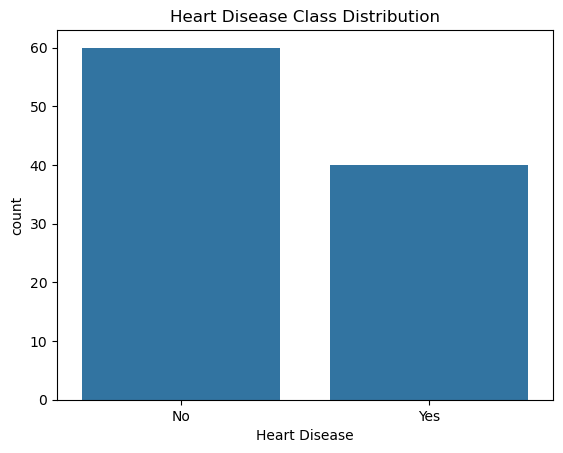

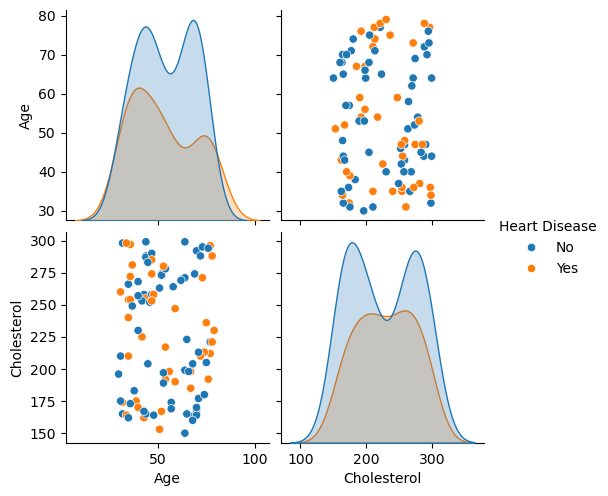

In [44]:
sns.countplot(x='Heart Disease', data=df)
plt.title('Heart Disease Class Distribution')
plt.show()

sns.pairplot(df, hue='Heart Disease')
plt.show()


In [45]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [47]:
print(df['Blood Pressure'].head())


0    143/83
1    150/85
2    143/95
3    126/89
4    168/90
Name: Blood Pressure, dtype: object


In [48]:
# Split BP into systolic and diastolic
bp_split = df['Blood Pressure'].str.split('/', expand=True)
bp_split.columns = ['Systolic', 'Diastolic']

# Add to dataframe as numeric
df['Systolic'] = pd.to_numeric(bp_split['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(bp_split['Diastolic'], errors='coerce')


In [49]:
df = df.drop(columns=['Blood Pressure'])


In [50]:
print(df[['Systolic', 'Diastolic']].describe())
print(df[['Systolic', 'Diastolic']].isnull().sum())


         Systolic   Diastolic
count  100.000000  100.000000
mean   145.360000   88.970000
std     19.714897   11.609344
min    110.000000   70.000000
25%    129.000000   80.000000
50%    146.500000   88.000000
75%    162.000000   97.250000
max    180.000000  110.000000
Systolic     0
Diastolic    0
dtype: int64


In [51]:
df = df.dropna(subset=['Systolic', 'Diastolic'])


In [52]:
numerical_cols = ['Age', 'Cholesterol', 'Systolic', 'Diastolic']


In [53]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [54]:
X = df[['Age', 'Gender', 'Cholesterol', 'Systolic', 'Diastolic']]


In [55]:
y = df['Heart Disease']


In [56]:
scaler = StandardScaler()

numerical_cols = ['Age', 'Cholesterol','Systolic', 'Diastolic']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [58]:
X = df[['Age', 'Gender', 'Cholesterol','Systolic', 'Diastolic']]
y = df['Heart Disease']



In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [61]:
y_pred = model.predict(X_test)


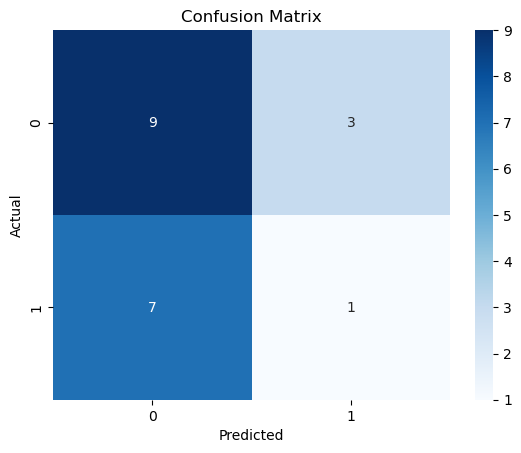

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [63]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.56      0.75      0.64        12
         Yes       0.25      0.12      0.17         8

    accuracy                           0.50        20
   macro avg       0.41      0.44      0.40        20
weighted avg       0.44      0.50      0.45        20



In [64]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.50
